<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW_2_LinearModels1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Linear Model in Python

We are going to compute the linear relationship between two numeric variables using ordinary least squires (OLS). This is a technique for describing how variation in one variable (X) helps explain variation in another (Y). We'll also visualize the relationship.

This will be the foundation upon which we can build a sociological analysis of data about the social world.

The code in Python to do this is relatively straight-forward. If you've had a statistics course, you've probably seen the statistical tools. But don't worry if you haven't. I'll explain the steps so that you can reproduce the analysis with variables you select.

First, we need to import some standard libraries.

In [1]:
# Code block 1: Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as scp

Next, we'll read in data and create a DataFrame object. We'll use variables from this data object in our analysis and visualization.

The external file is an Excel spreadsheet. In our last lesson, we saw the code for reading in an Excel file.

The data are global social indicators -- that is, measures of the characteristics of society that allow us to compare nations. The cases in this file are countries. Our explanations, then, should focus on the relationship between characteristics of countries, not of individuals.

In [2]:
# Code block 2: Read in data - can also include a bit of data biography here - where did you get it from, who made it
# Handle missing data by leaving cell empty - change string 'NA' to np.nan b/c text data handled differently in excel vs Python
# Index by country
GlobalSocialIndicators = pd.read_excel('http://data.shortell.nyc/files/HumanDevelopment.xlsx', index_col='Country', na_values=[np.nan])
GlobalSocialIndicators.head() # This allows us to inspect the top of the data file

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
Country,,,,,,,
Norway,1,0.944,81.6,17.5,12.6,64992,5
Australia,2,0.935,82.4,20.2,13.0,42261,17
Switzerland,3,0.930,83.0,15.8,12.8,56431,6
Denmark,4,0.923,80.2,18.7,12.7,44025,11
Netherlands,5,0.922,81.6,17.9,11.9,45435,9


In [3]:
GlobalSocialIndicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Norway to Niger
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                188 non-null    int64  
 1   Human Development Index (HDI)           188 non-null    float64
 2   Life Expectancy at Birth                188 non-null    float64
 3   Expected Years of Education             188 non-null    float64
 4   Mean Years of Education                 188 non-null    float64
 5   Gross National Income (GNI) per Capita  188 non-null    int64  
 6   GNI per Capita Rank Minus HDI Rank      188 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 11.8+ KB


In [4]:
# Use describe method - attached to dataframe data object - to get descriptive stats for specific numeric values
GlobalSocialIndicators[['Human Development Index (HDI)', 'Gross National Income (GNI) per Capita', 'Expected Years of Education']].describe()

,Human Development Index (HDI),Gross National Income (GNI) per Capita,Expected Years of Education
count,188.000000,188.000000,188.00000
mean,0.692457,17014.808511,12.88617
std,0.154701,18793.634361,2.86827
min,0.348000,581.000000,4.10000
25%,0.573750,3690.500000,11.10000
50%,0.724000,10667.000000,13.10000
75%,0.816500,22800.500000,15.02500
max,0.944000,123124.000000,20.20000


In [ ]:
# Use describe method - attached to dataframe data object - to get descriptive stats for numeric variables
GlobalSocialIndicators.describe()

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
count,188.000000,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000
mean,94.313830,0.692457,71.105319,12.88617,8.110106,17014.808511,0.186170
std,54.431652,0.154701,8.383277,2.86827,3.092782,18793.634361,17.326139
min,1.000000,0.348000,49.000000,4.10000,1.400000,581.000000,-84.000000
25%,47.750000,0.573750,65.475000,11.10000,5.575000,3690.500000,-9.000000
50%,94.000000,0.724000,73.200000,13.10000,8.500000,10667.000000,1.500000
75%,141.250000,0.816500,76.800000,15.02500,10.725000,22800.500000,11.000000
max,188.000000,0.944000,84.000000,20.20000,13.100000,123124.000000,47.000000


In this example, I'm going to try to explain variation in life expectancy. **Why do some countries have a higher life expectancy than others?** The sociological explanation should focus on the characteristics of countries.

One possible explanation has to do with standard of living. The higher the standard of living in a nation, the longer the life expectancy. A higher standard of living is associated with a variety of social factors that might be causally related to life expectancy, including health and well-being. Wealthier nations tend to have better systems of healthcare and other institutions that contribute to overall well-being, including education, culture industry, and leisure.

So I am going to use 'Life Expectancy at Birth' as the variable I'm trying to explain. I'm going to use 'Gross National Income (GNI) per Capita' as the causal factor. My hypothesis is that countries with higher GNI per capita will have higher life expectancy.

In [9]:
# Code block 3: The linear model - How much of the human development index (HDI) is affected by the mean years of education?
# Numeric values - least squares regression
Y = GlobalSocialIndicators['Human Development Index (HDI)']
X = GlobalSocialIndicators['Mean Years of Education']
X = sm.add_constant(X) # add consstant b/c don't want to assume that 0 is meaningful
model0 = sm.OLS(Y, X, missing='drop').fit() #drop cases w/ missing values
print(model0.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Human Development Index (HDI)   R-squared:                       0.808
Model:                                       OLS   Adj. R-squared:                  0.807
Method:                            Least Squares   F-statistic:                     781.6
Date:                           Wed, 18 Sep 2024   Prob (F-statistic):           1.62e-68
Time:                                   01:50:40   Log-Likelihood:                 239.61
No. Observations:                            188   AIC:                            -475.2
Df Residuals:                                186   BIC:                            -468.7
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

The way that we interpret the results is as follows.

# First, we look to see if the linear model is reliable.
That is, are the results in the table likely to indicate a real relationship between the variables or just random error? **The test of statistical significance is an F-test, and by convention, if the probability of the test is less than 5%, 0.05, then we accept the table as reliable.**

In this case, the **F-test (in the bottom part of the table) has a probability of 1.62e-68, which is less than 0.05.** This table is reliable. We can go on to step 2.

# The next step is to interpret the goodness of fit of the model.
That is, **how much of the variation in human development index is explained by variation in mean years of education?** This is measured by a parameter called *R-squared*. The value is the proportion of explained variation.
**-squared = 0.808. This means that 81% of the variation in the human development index is explained by the model. This is pretty good fit for a bivariate linear model.**

# The third step is to look at the parameter that describes the relationship between GNI per capita and life expectancy.
First we check to see that this parameter is reliable. The **t-test has a probability of 0.000, which is less than 0.05, so we can interpret the result. The coefficient is 0.0450.** In OLS, the coefficient is expressed in the units of the variable we are trying to explain (dependent) (Y), in this case, human development index.

### **For a one unit change in mean year of education, we would expect a 0.0450 increase in the human development index**.
This seems like a very small effect.


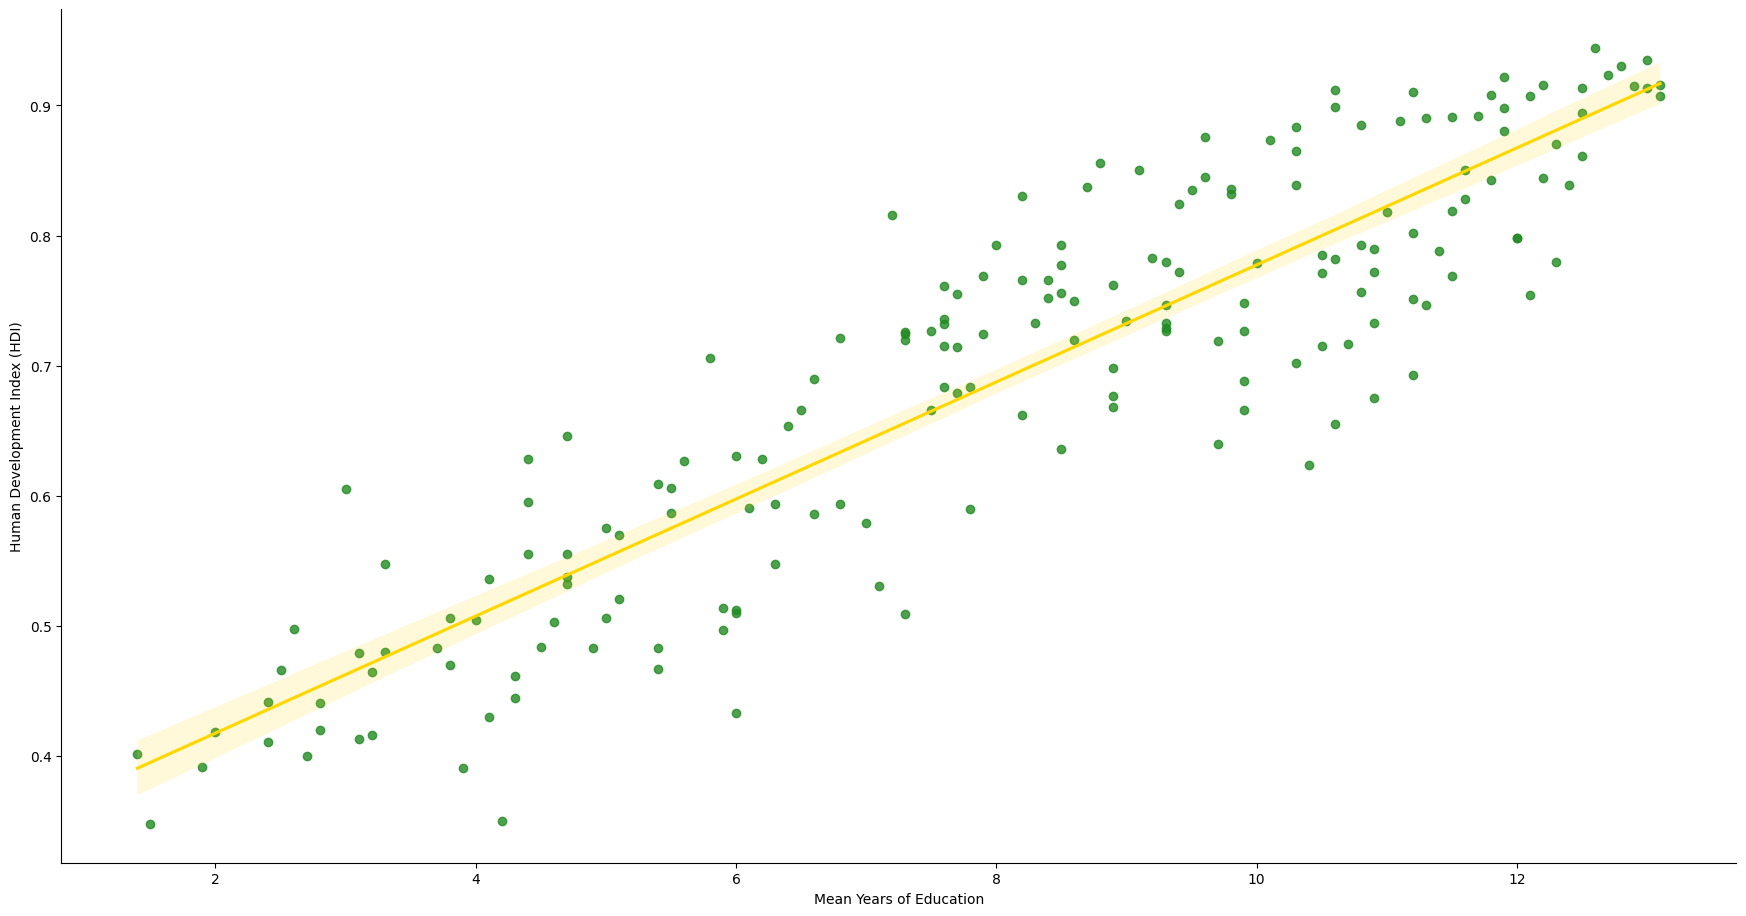

In [20]:
# Code block 4: Visualizing the linear model w/ seaborn library & linear model plot
# Default is to show the confidence interval
# Richer countries have longer life expectancies
# Larger margin of error at 1 side of dataset
p = sb.lmplot(x='Mean Years of Education', y='Human Development Index (HDI)', data=GlobalSocialIndicators, scatter_kws={"color": "forestgreen"}, line_kws={"color": "gold"}) # added code to change colors of both data points and lines
p.fig.set_figwidth(20)
p.fig.set_figheight(10)
plt.show()

We're using a method in the Seaborn library to plot the linear model. (We'll talk more about the Seaborn library in our next lesson.) This gives us a sense of the relationship for the data as a whole. We see more-or-less a direct relationship between mean years of education and the human development index. **Nations with higher human development index typically have higher mean years of education.**



In [ ]:
# Can look at 2 independent variables together
# Code block 5: The linear model
Y = GlobalSocialIndicators['Life Expectancy at Birth']
X = GlobalSocialIndicators[['Gross National Income (GNI) per Capita', 'Expected Years of Education']] #2 variables use 2 brackets
X = sm.add_constant(X)
model2 = sm.OLS(Y, X, missing='drop').fit()
print(model2.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at Birth   R-squared:                       0.653
Model:                                  OLS   Adj. R-squared:                  0.649
Method:                       Least Squares   F-statistic:                     173.8
Date:                      Wed, 03 Mar 2021   Prob (F-statistic):           3.34e-43
Time:                              18:26:41   Log-Likelihood:                -566.60
No. Observations:                       188   AIC:                             1139.
Df Residuals:                           185   BIC:                             1149.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

- model is reliable b/c Prob f-stat is < 0.05 (have lots of data pts)
- goodness of fit - R-squared - explains 65% of life expectancy with GNI & expected years of edu (better model than the first)
- Controlling for education, Each $1000 increase correlates to 10th of a year of life expectancy
- Every additional year of expected education correlates to almost 2 years (1.8) of life expectancy at birth (substantial effect for edu)
- If doing this for policy, invest in schooling b/c it has a large impact on life expectancy  


In [ ]:
# Checking on colinearity
corrtab, corrsig = scp.stats.pearsonr(GlobalSocialIndicators['Gross National Income (GNI) per Capita'], GlobalSocialIndicators['Mean Years of Education'])
corrtab

0.5701033493623587

In [ ]:
corrsig

1.3494512118194201e-17

## Activity

1. Read in the Global Social Indicators data and create a DataFrame.
2. Identify a numeric variable that you want to explain. This is your dependent variable (DV), usually named Y. Describe the variable.
3. Identify a numeric variable that you think might partially explain your DV. This is your independent variable (IV), usually named X. Describe this variable.
4. Compute the linear model (using OLS), using the code in block 3 as a guide.
5. Visualize the linear model, using code in block 4 as a model.
6. Interpret the results.

